# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount gambier
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | marsh harbour
Processing Record 5 of Set 1 | melfort
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | selfoss
Processing Record 9 of Set 1 | sanctuary point
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | gadzhiyevo
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | smithers
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | novodvinsk
Processing Record 22 of Set 1 | znamenka
Process

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount gambier,-37.8333,140.7667,7.87,75,92,2.70,AU,1730393986
1,bathsheba,13.2167,-59.5167,31.34,66,40,5.66,BB,1730393987
2,port-aux-francais,-49.3500,70.2167,4.60,95,100,16.53,TF,1730393989
3,marsh harbour,26.5412,-77.0636,26.13,59,66,9.52,BS,1730393990
4,melfort,52.8667,-104.6177,-2.93,93,22,3.60,CA,1730393992


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount gambier,-37.8333,140.7667,7.87,75,92,2.70,AU,1730393986
1,bathsheba,13.2167,-59.5167,31.34,66,40,5.66,BB,1730393987
2,port-aux-francais,-49.3500,70.2167,4.60,95,100,16.53,TF,1730393989
3,marsh harbour,26.5412,-77.0636,26.13,59,66,9.52,BS,1730393990
4,melfort,52.8667,-104.6177,-2.93,93,22,3.60,CA,1730393992


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

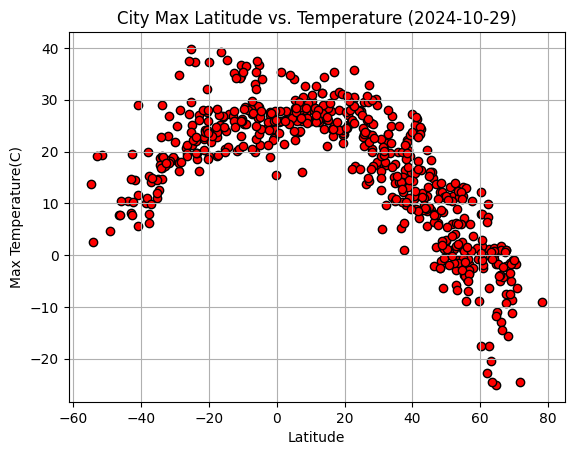

In [9]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

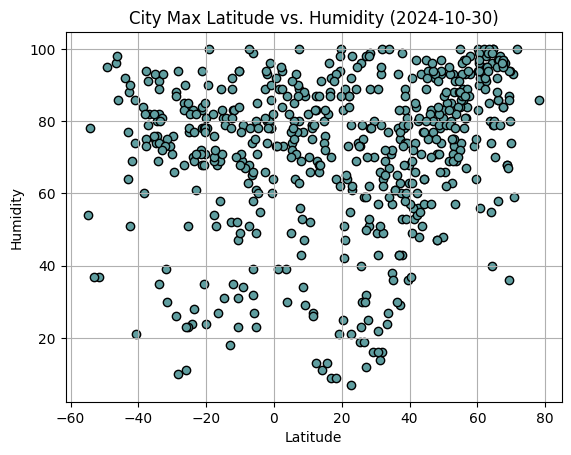

In [10]:
# Build scatter plot for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker="o", facecolors="CadetBlue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-10-30)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

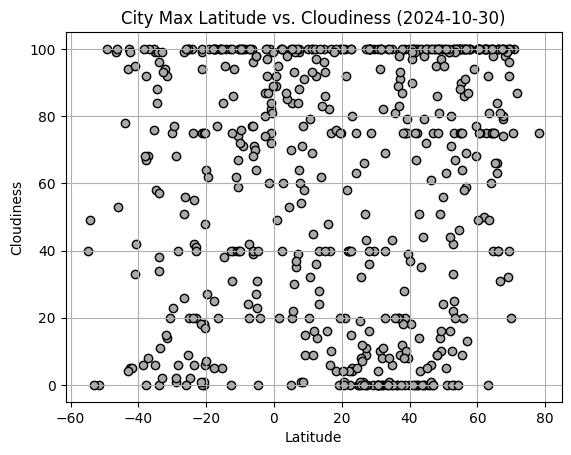

In [11]:
# Build scatter plot for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker="o", facecolors="DarkGray", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-10-30)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

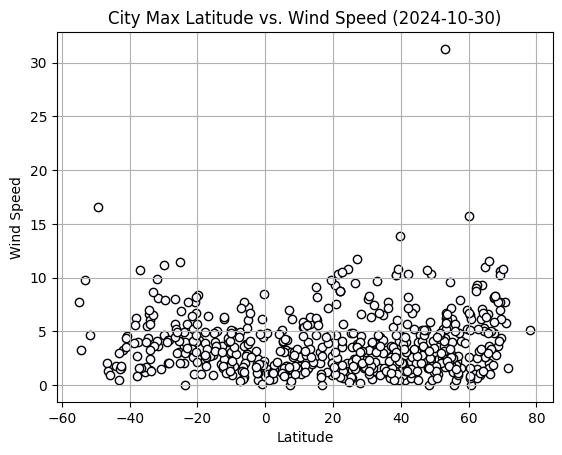

In [12]:
# Build scatter plot for latitude vs. wind speed

latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker="o", facecolors="GhostWhite", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-10-30)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots

# Xpert Learning Assistant showed me how to create/define a function (first line only)
def create_linear_regression_plot(x_values, y_values):

    #perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #calculate regression values
    regress_values = x_values * slope + intercept

    #create the line regression string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #create a scatter plot
    plt.scatter(x_values, y_values)

    #plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # format annotation for the line equation
    # plt.annotate(line_eq, (x_values.mean(), y_values.mean()), fontsize=15, color="red")
    plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")

    # Calculate R-squared
    #Xpert Assistance provided
    r_squared = rvalue**2
    print(f"The R-squared value is: {r_squared}")

    plt.show()

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bathsheba,13.2167,-59.5167,31.34,66,40,5.66,BB,1730393987
3,marsh harbour,26.5412,-77.0636,26.13,59,66,9.52,BS,1730393990
4,melfort,52.8667,-104.6177,-2.93,93,22,3.60,CA,1730393992
6,tiksi,71.6872,128.8694,-24.59,100,87,1.59,RU,1730393995
7,selfoss,63.9331,-20.9971,0.02,55,60,7.06,IS,1730393997


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount gambier,-37.8333,140.7667,7.87,75,92,2.70,AU,1730393986
2,port-aux-francais,-49.3500,70.2167,4.60,95,100,16.53,TF,1730393989
5,papatowai,-46.5619,169.4708,7.78,96,99,2.07,NZ,1730393994
8,sanctuary point,-35.1114,150.6290,14.60,75,99,1.45,AU,1730393998
11,ushuaia,-54.8000,-68.3000,13.81,54,40,7.72,AR,1730394003


###  Temperature vs. Latitude Linear Regression Plot

The R-squared value is: 0.7631570380524023


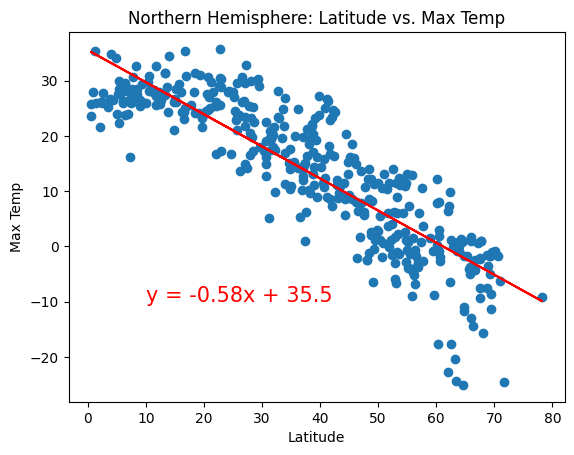

In [65]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

x_pos = 10
y_pos = -10

create_linear_regression_plot(x_values, y_values)

The R-squared value is: 0.4078748053658659


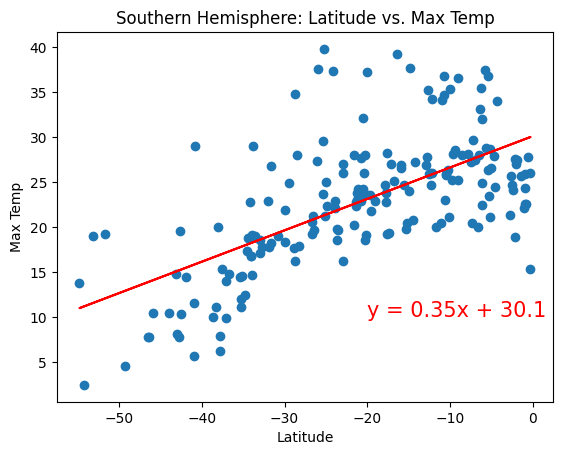

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

x_pos = -20
y_pos = 10

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** 

Both of the scatter plots and linear regression lines show a correlation between latitude and max temperature. 

For northern hemisphere cities, as latitude increases (that is, as locations get further from the equator, or latitude 0), there is a very strong negative correlation as temperatures decrease. 

For southern hemisphere cities, as latitude decreases (that is, as locations get closer to the equator), there is a moderate positive correlation as temperatures increase. 

### Humidity vs. Latitude Linear Regression Plot

The R-squared value is: 0.09136085709875034


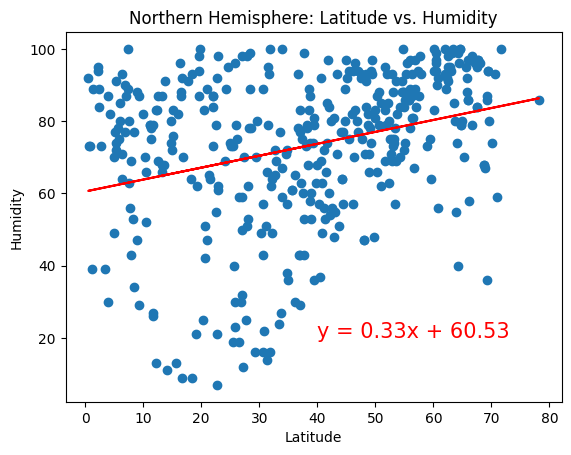

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

x_pos = 40
y_pos = 20

create_linear_regression_plot(x_values, y_values)

The R-squared value is: 0.002468721701285117


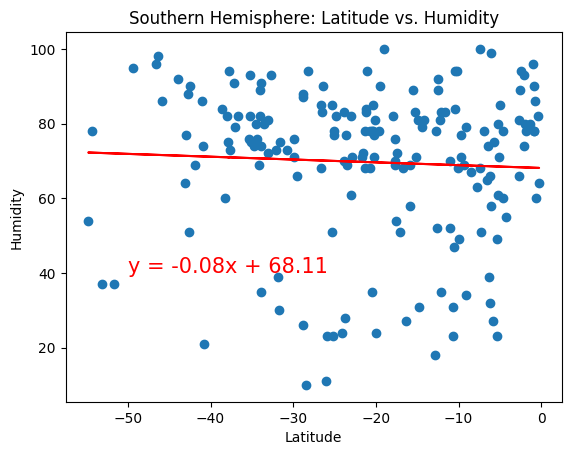

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

x_pos = -50
y_pos = 40

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** The scatter plots and linear regression lines show a very weak correlation between latitude and humidity.
In both the northern and southern hempispheres, there are cities with higher latitiudes that have high humidiy but also many lower latitude cities with high humidity. The same can be said for cities in lower and high latitudes and low humidity conditions. There is no clear correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared value is: 0.03446080073099789


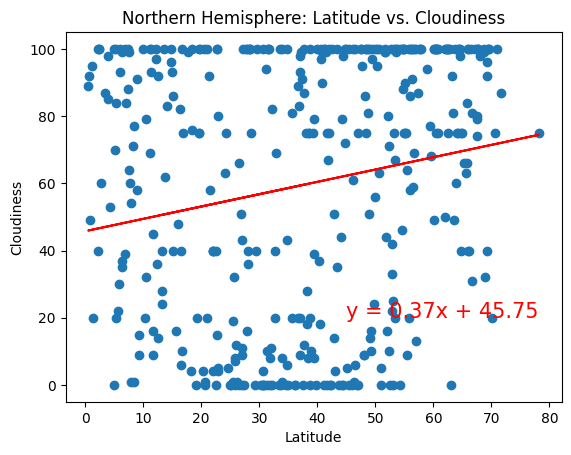

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

x_pos = 45
y_pos = 20

create_linear_regression_plot(x_values, y_values)

The R-squared value is: 0.039206153369163256


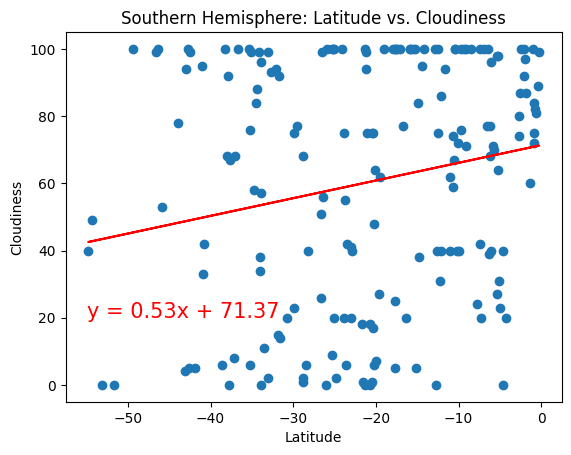

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

x_pos = -55
y_pos = 20

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** The scatter plots and linear regression lines show a very weak correlation between latitude and cloudiness. In particular, the northern hemisphere cloudiness does not show any relationship to latitude. In the southern hemisphere, lower latitudes (further from latitude 0, the equator) do seem to have less cloudiness while cloudiness may increase in cities closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared value is: 0.03828737037637821


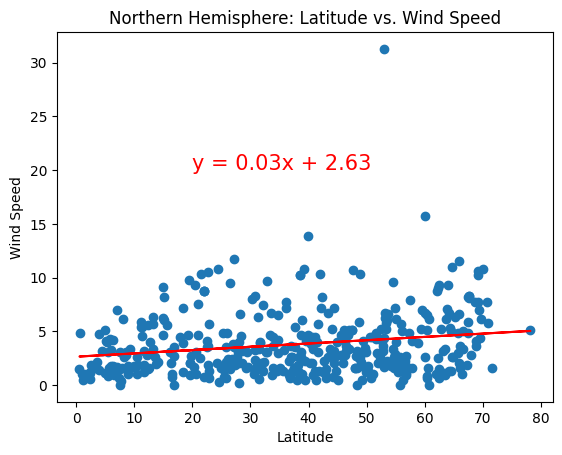

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

x_pos = 20
y_pos = 20

create_linear_regression_plot(x_values, y_values)

The R-squared value is: 0.03959741407624887


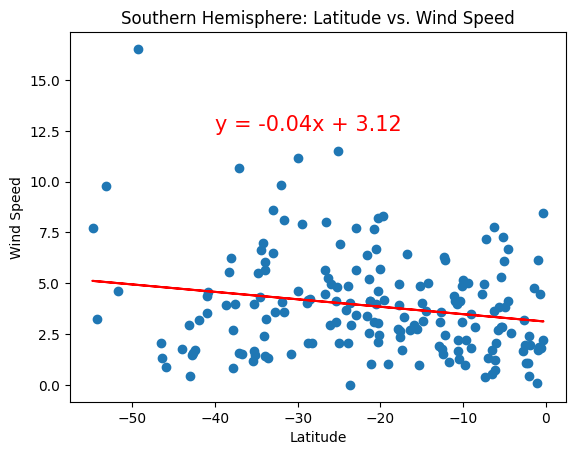

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

x_pos = -40
y_pos = 12.5

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** The scatter plots and linear regression lines show a very weak correlation between latitude and windspeed but primarily for northern hemisphere cities. Overall, it is rare to see a windspeed over 10 in northern hemisphere cities. In southern hemisphere cities, there is slight negative correlation: there are some high wind speeds at lower latitudes (further from the equator), up to 14, and as one approaches the equator, wind speeds may decrease below 10. 